In [1]:
from arch.bootstrap import SPA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1

## wrt HRP

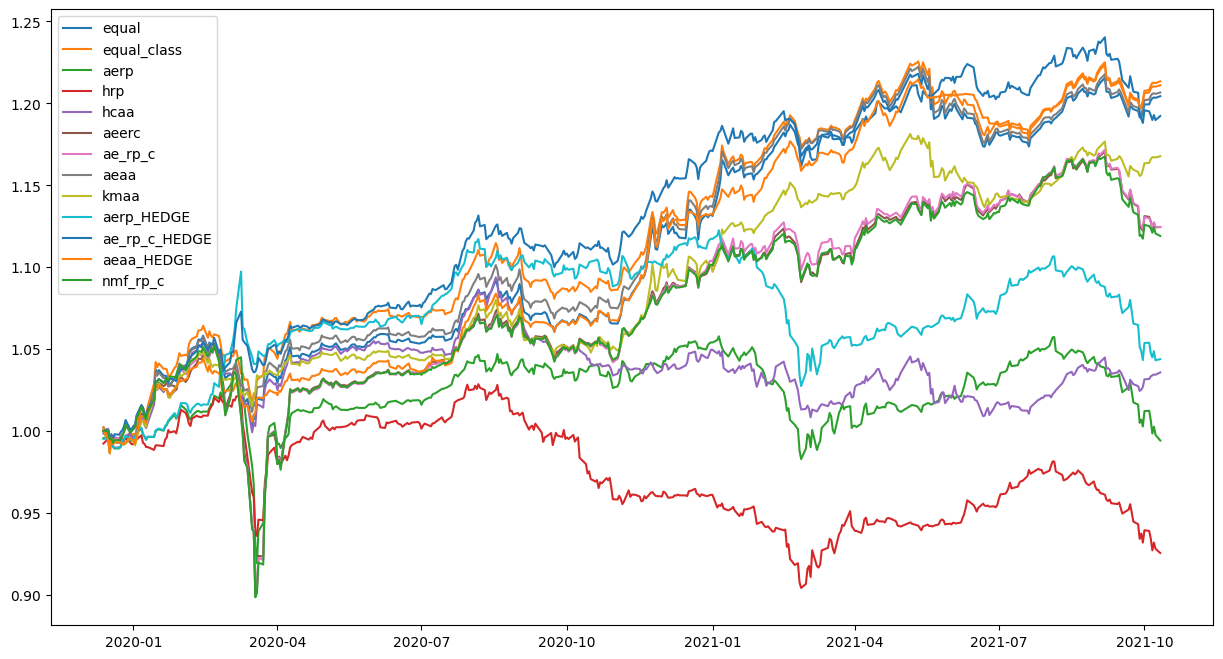

In [2]:
perf_dir = "performance/test_final_models/ae/dataset1_20220322_150317"
ae_returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)

h_returns = pd.read_csv(f"{perf_dir}/portfolios_returns_hedged_0.csv", index_col=0, parse_dates=True)
h_returns.columns = [c + "_HEDGE" for c in h_returns.columns]
returns = pd.concat([ae_returns, h_returns], axis=1)

perf_dir = "performance/test_final_models/nmf/dataset1_20220322_145318"
nmf_returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)
nmf_returns = nmf_returns[["ae_rp_c"]]
nmf_returns.columns = ["nmf_rp_c"]
returns = pd.concat([returns, nmf_returns], axis=1)
plt.figure(figsize=(15,8))
plt.plot(np.cumprod(returns + 1))
plt.legend(returns.columns)

In [3]:
spa = SPA(-returns["hrp"], -returns.drop("hrp", axis=1), block_size=60, reps=5000, 
              bootstrap="stationary", studentize=True)
spa.compute()
spa._loss_diff.shape

crit_val = spa.critical_values(pvalue=0.05)["consistent"]
better_models = spa._loss_diff.mean(0) > crit_val
better_models = np.logical_and(better_models, spa._selector)
list(spa.models.columns[better_models])

['equal',
 'equal_class',
 'aeerc',
 'ae_rp_c',
 'aeaa',
 'kmaa',
 'ae_rp_c_HEDGE',
 'aeaa_HEDGE']

equal


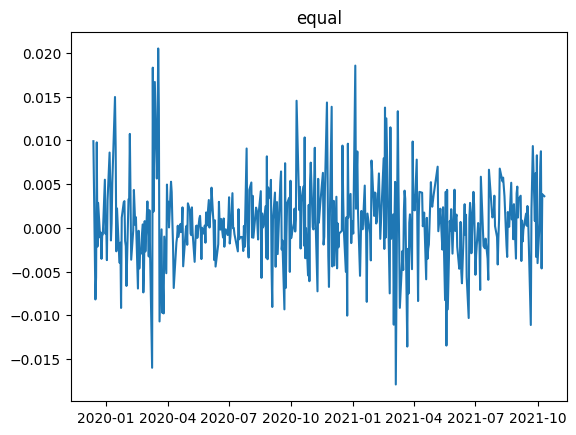

equal_class


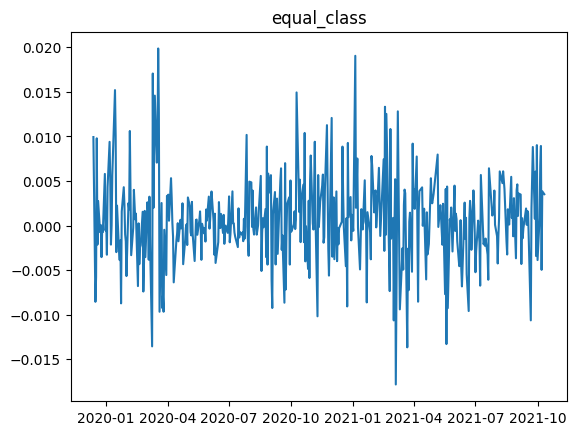

aerp


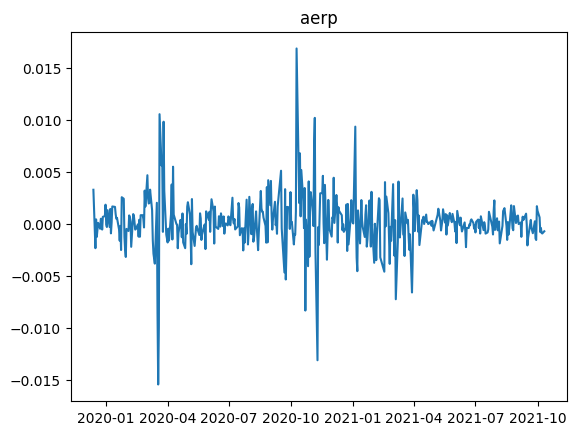

hrp


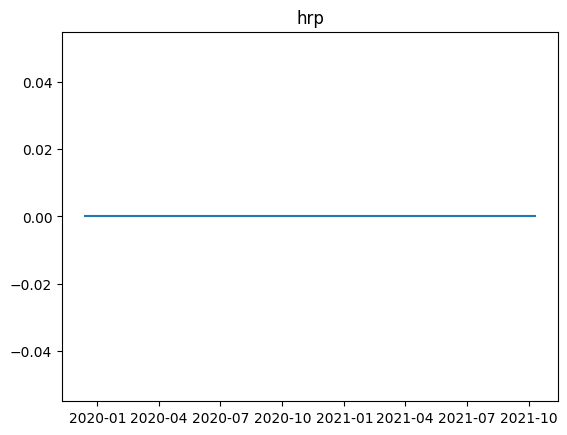

hcaa


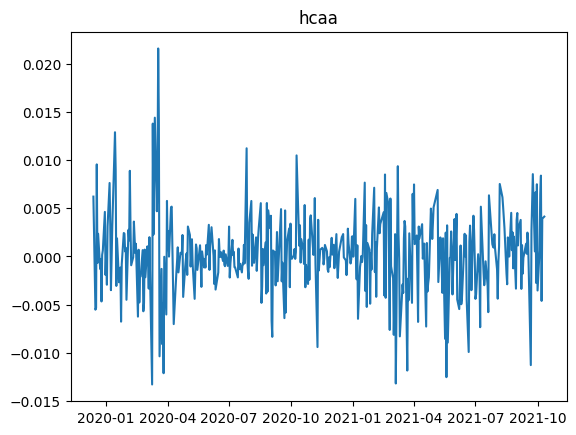

aeerc


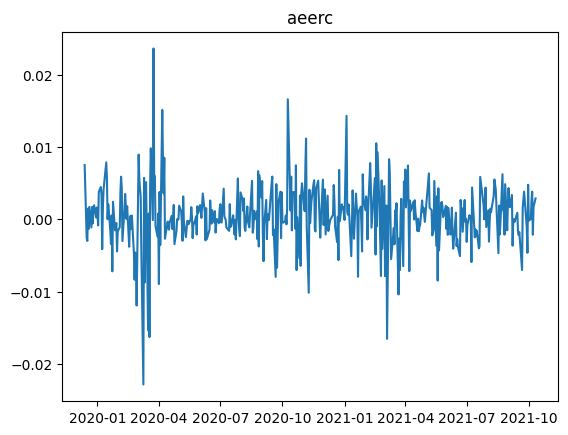

ae_rp_c


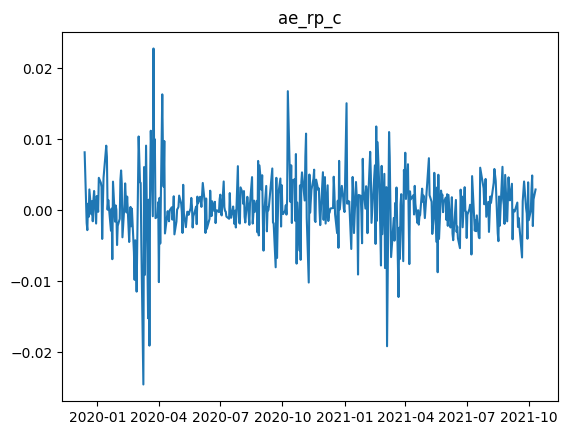

aeaa


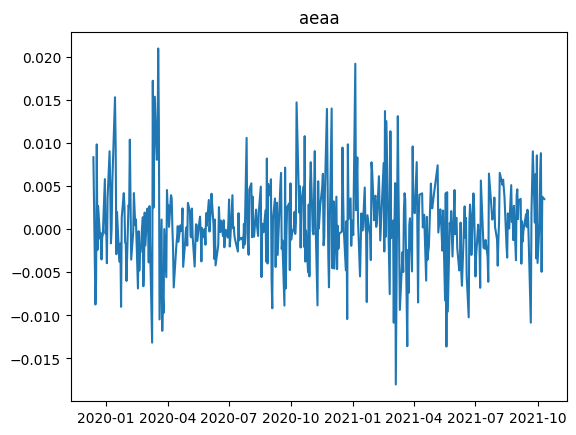

kmaa


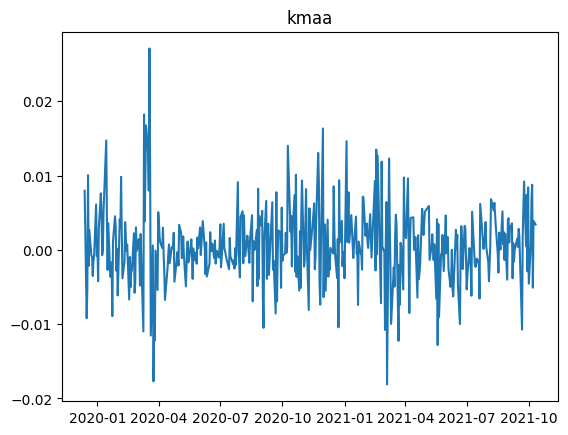

aerp_HEDGE


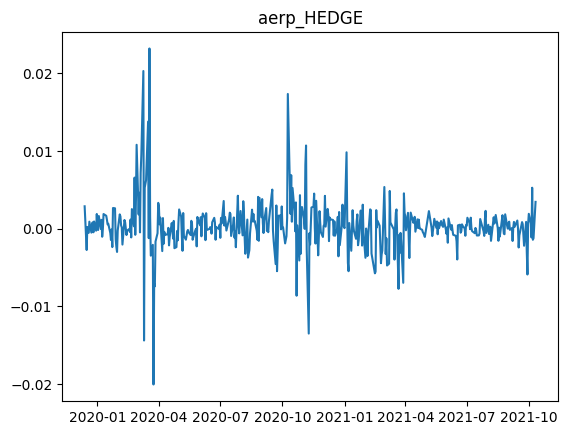

ae_rp_c_HEDGE


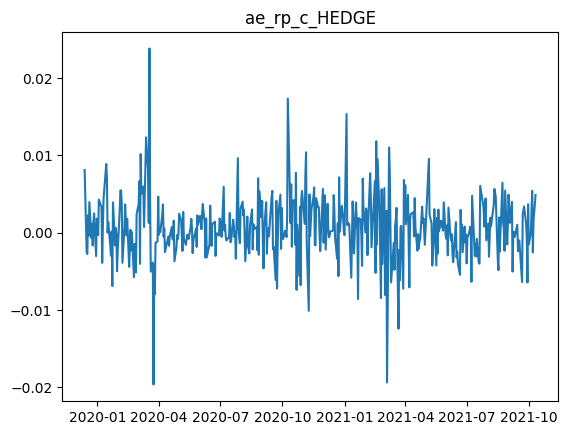

aeaa_HEDGE


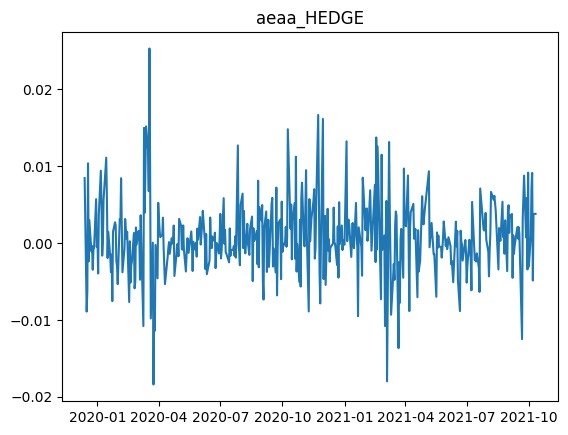

nmf_rp_c


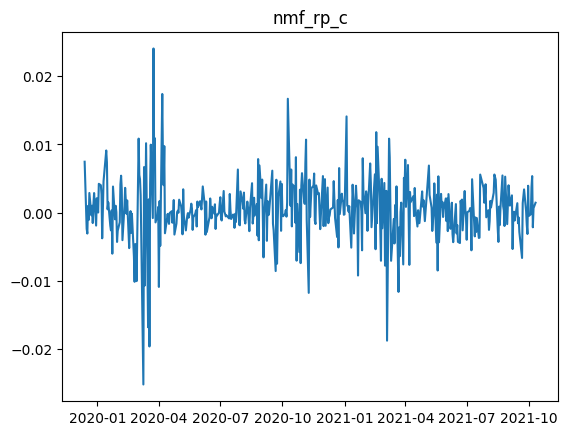

,lower,consistent,upper
equal,0.0056,0.0056,0.0056
equal_class,0.0028,0.0028,0.0028
aerp,0.0952,0.0952,0.0952
hcaa,0.0648,0.0648,0.0648
aeerc,0.0052,0.0052,0.0052
ae_rp_c,0.0110,0.0110,0.0110
aeaa,0.0040,0.0040,0.0040
kmaa,0.0118,0.0118,0.0118
aerp_HEDGE,0.0582,0.0582,0.0582
ae_rp_c_HEDGE,0.0000,0.0000,0.0000


In [4]:
test_res = []
for c in returns.columns:
    print(c)
    loss_diff = -returns["hrp"] + returns[c]
    plt.plot(loss_diff)
    plt.title(c)
    plt.show()
    spa = SPA(-returns["hrp"], -returns[c], block_size=60, reps=5000, 
              bootstrap="stationary", studentize=True)
    spa.compute()
    test_res.append(spa.pvalues)

test_res = pd.DataFrame(test_res, index = returns.columns).drop("hrp")
test_res

# Dataset 2


equal p-values of SPA:
lower         0.3594
consistent    0.3594
upper         0.3594
dtype: float64

equal_class p-values of SPA:
lower         0.1848
consistent    0.1848
upper         0.1848
dtype: float64

aerp p-values of SPA:
lower         0.2118
consistent    0.2118
upper         0.2118
dtype: float64

hrp p-values of SPA:
lower         0.0
consistent    0.0
upper         0.0
dtype: float64

hcaa p-values of SPA:
lower         0.3564
consistent    0.3564
upper         0.3564
dtype: float64

aeerc p-values of SPA:
lower         0.1424
consistent    0.1424
upper         0.1424
dtype: float64

ae_rp_c p-values of SPA:
lower         0.1328
consistent    0.1328
upper         0.1328
dtype: float64

aeaa p-values of SPA:
lower         0.4078
consistent    0.4078
upper         0.4078
dtype: float64

kmaa p-values of SPA:
lower         0.3938
consistent    0.3938
upper         0.3938
dtype: float64

aerp_HEDGE p-values of SPA:
lower         0.4980
consistent    0.9736
upper         0.973

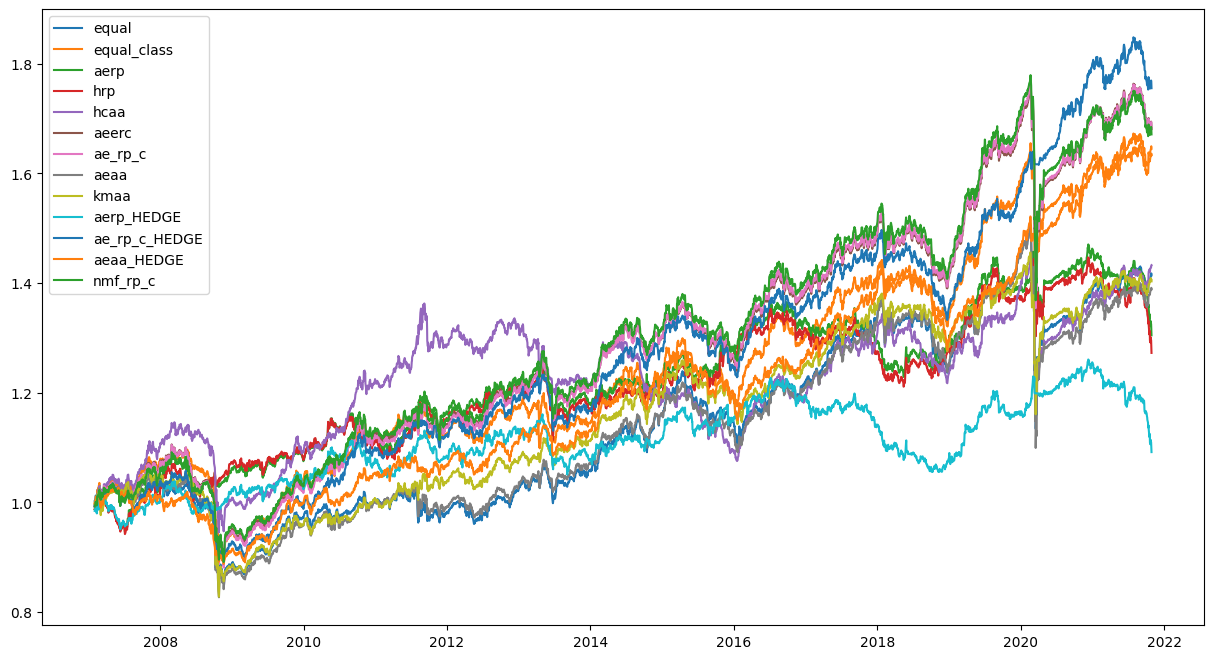

In [7]:
perf_dir = "performance/test_final_models/ae/dataset2_20220323_152418"
ae_returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)

h_returns = pd.read_csv(f"{perf_dir}/portfolios_returns_hedged_0.csv", index_col=0, parse_dates=True)
h_returns.columns = [c + "_HEDGE" for c in h_returns.columns]
returns = pd.concat([ae_returns, h_returns], axis=1)

perf_dir = "performance/test_final_models/nmf/dataset2_20220322_151938"
nmf_returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)
nmf_returns = nmf_returns[["ae_rp_c"]]
nmf_returns.columns = ["nmf_rp_c"]
returns = pd.concat([returns, nmf_returns], axis=1)


plt.figure(figsize=(15,8))
plt.plot(np.cumprod(returns + 1))
plt.legend(returns.columns)

for c in returns.columns:
    spa = SPA(-np.log(returns["hrp"]+1), -np.log(returns[c]+1), block_size=60, reps=5000, 
              bootstrap="stationary", studentize=True)
    spa.compute()
    print(f"{c} p-values of SPA:")
    print(spa.pvalues)
    print()


equal


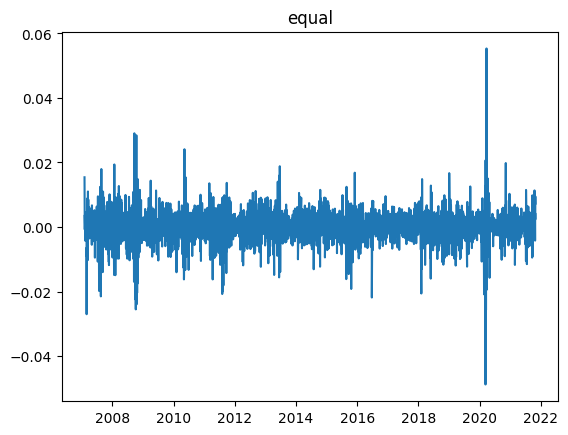

equal_class


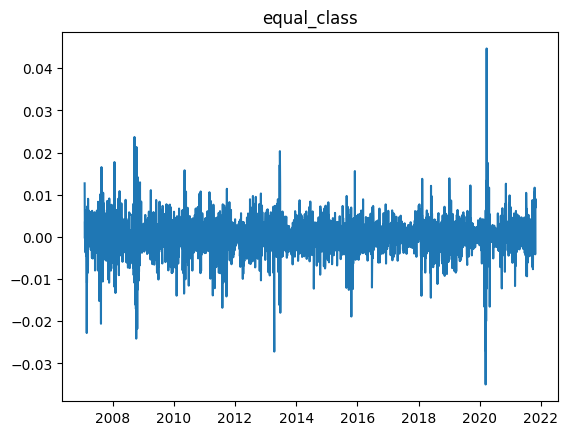

aerp


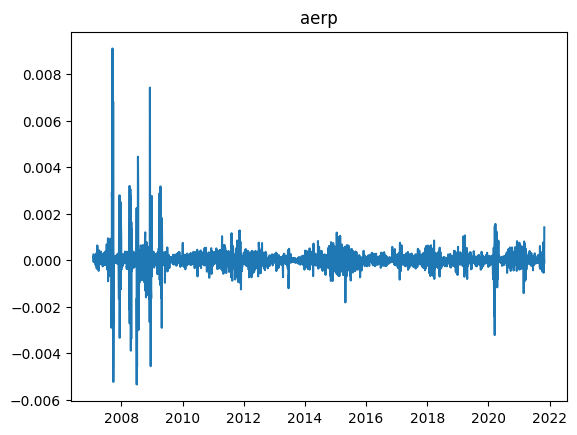

hrp


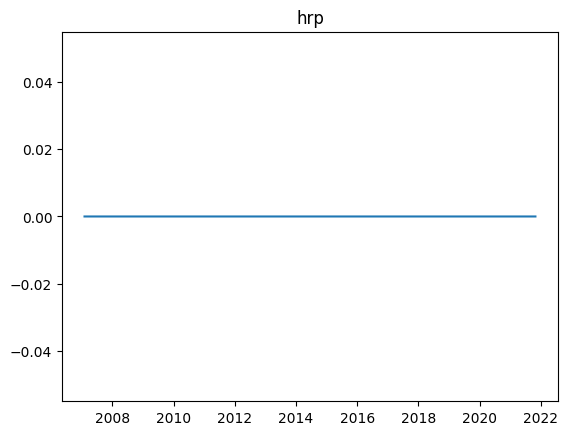

hcaa


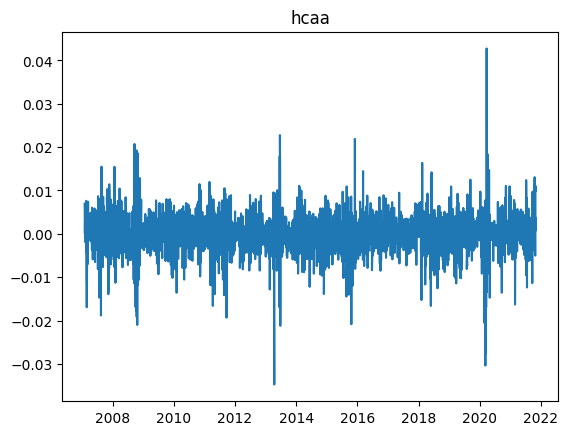

aeerc


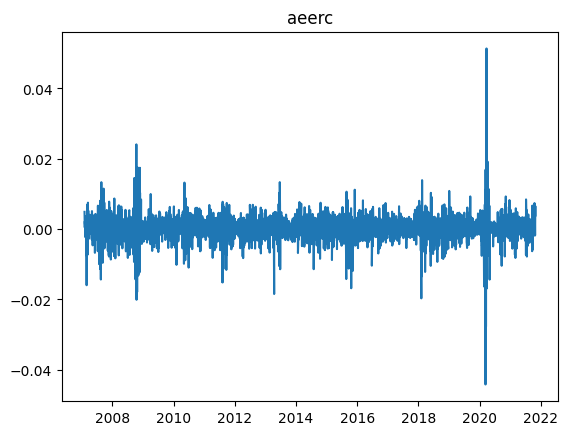

ae_rp_c


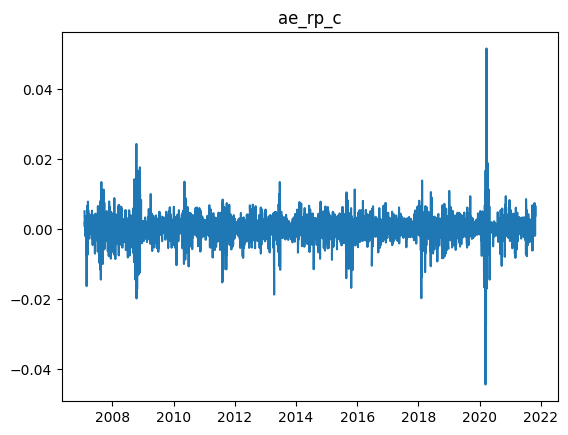

aeaa


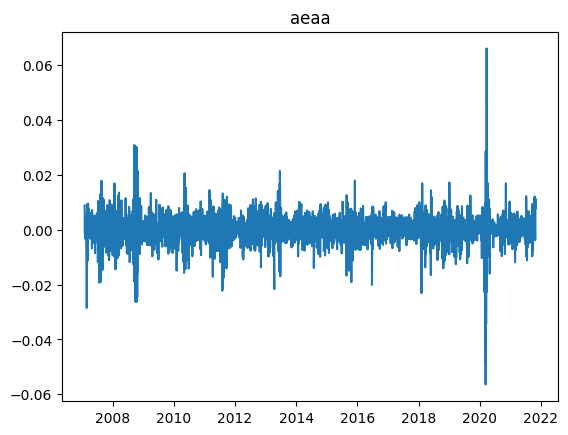

kmaa


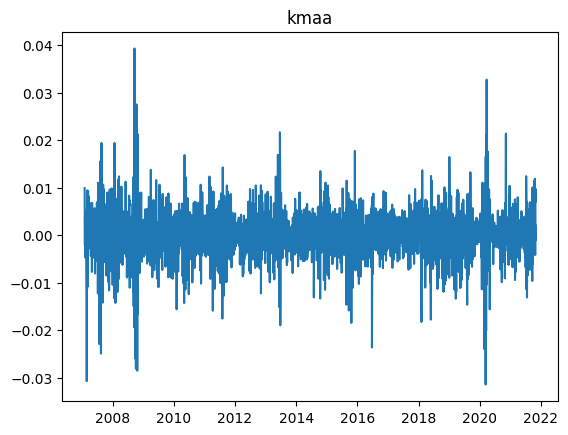

aerp_HEDGE


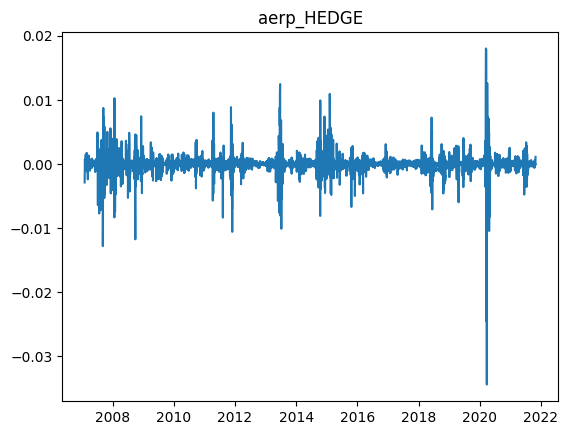

ae_rp_c_HEDGE


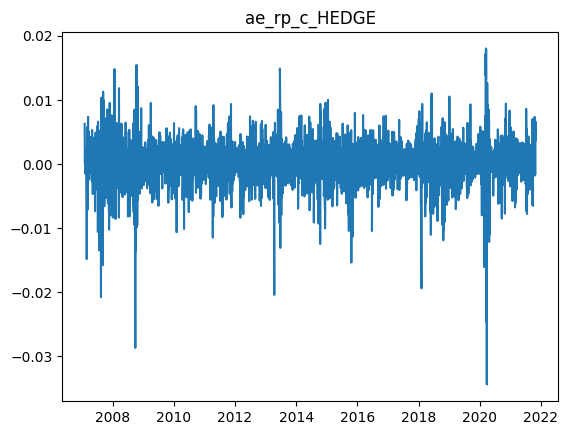

aeaa_HEDGE


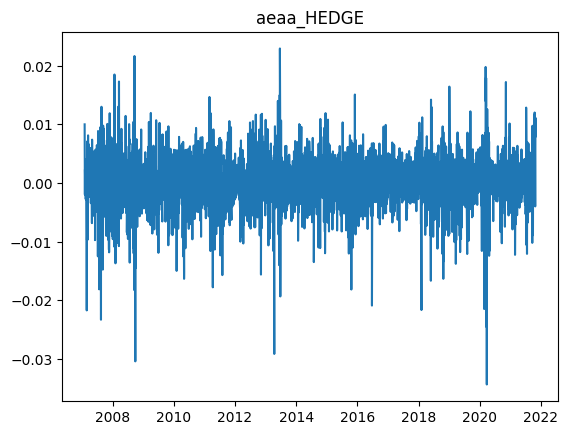

nmf_rp_c


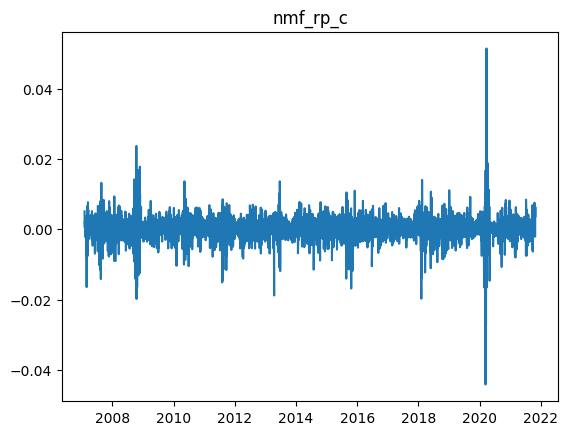

,lower,consistent,upper
equal,0.3732,0.3732,0.3732
equal_class,0.1850,0.1850,0.1850
aerp,0.2172,0.2172,0.2172
hcaa,0.3518,0.3518,0.3518
aeerc,0.1324,0.1324,0.1324
ae_rp_c,0.1284,0.1284,0.1284
aeaa,0.3846,0.3846,0.3846
kmaa,0.3626,0.3626,0.3626
aerp_HEDGE,0.5020,0.9734,0.9734
ae_rp_c_HEDGE,0.0954,0.0954,0.0954


In [8]:
test_res = []
for c in returns.columns:
    print(c)
    loss_diff = -returns["hrp"] + returns[c]
    plt.plot(loss_diff)
    plt.title(c)
    plt.show()
    spa = SPA(-returns["hrp"], -returns[c], block_size=60, reps=5000, 
              bootstrap="stationary", studentize=True)
    spa.compute()
    test_res.append(spa.pvalues)

test_res = pd.DataFrame(test_res, index = returns.columns).drop("hrp")
test_res